In [3]:
import pandas as pd
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt
sns.set()

pd.set_option('display.max_columns', 500)

In [4]:
def get_best_results(metrics, groupby_cols= ['dataset_name', 'selection_name', 'model_name'], criteria='mae_valid'):


    best_results = metrics.loc[metrics.groupby(groupby_cols, dropna=False)[criteria].idxmin(), :].reset_index()

    return best_results

def count_features(feats):

    result = 0
    if type(feats) == list:
        result = len(feats)
    else:
        values = []
        for _,v in feats.items():
            values.extend(list(v))
        result = len(set(values))

    return result


In [5]:
total_metrics = pd.read_csv("results/results.csv")
total_metrics2 = pd.read_csv("results/results2.csv")

total_metrics = pd.concat((total_metrics, total_metrics2)).reset_index(drop=True)

total_metrics["n_features"] = total_metrics.selected_features.apply(eval).apply(count_features)
total_metrics.loc[total_metrics.model_name=='dacnet', 'model_name'] = total_metrics.loc[total_metrics.model_name=='dacnet', 'model_name'] + '_'+total_metrics.loc[total_metrics.model_name=='dacnet', 'model_params_body_block']

In [6]:
total_metrics.loc[:, ['dataset_name', 'selection_name', 'model_name', 'rmse']].groupby(['dataset_name', 'selection_name', 'model_name']).std()

rmse
dataset_name selection_name model_name                
CIF2016o12   NoSelection    attn          1.728767e+05
                            cnn           8.782011e+04
                            dacnet_cnn    1.150481e+06
                            dacnet_fc     1.432418e+05
                            dacnet_lstm   7.239292e+03
                            dacnetattn    1.033897e+06
                            dense         7.928569e+04
                            itransformer  2.651320e+04
                            lstm          7.107003e+03
CIF2016o6    NoSelection    attn          2.530091e+07
                            cnn           1.229466e+07
                            dacnet_cnn    2.202749e+07
                            dacnet_fc     5.956754e+06
                            dacnet_lstm   1.281223e+07
                            dacnetattn    9.758685e+06
                            dense         1.660765e+07
                            itransformer  2.099238e+05
                            lstm          1.421119e+07
M3           NoSelection    attn          7.289495e+02
                            cnn           1.415675e+02
                            dacnet_cnn    4.192057e+01
                            dacnet_fc     3.298332e+01
                            dacnet_lstm   3.663304e+01
                            itransformer  1.120372e+02
                            lstm          9.682188e+01
M4           NoSelection    attn          1.288908e+02

In [9]:
total_metrics.columns

Index(['mae', 'mse', 'rmse', 'r2', 'mape', 'mase', 'wape', 'mae_valid',
       'mse_valid', 'rmse_valid', 'r2_valid', 'mape_valid', 'mase_valid',
       'wape_valid', 'dataset_name', 'dataset_params_seq_len',
       'dataset_params_pred_len', 'dataset_params_shift',
       'dataset_params_crossval', 'selection_name', 'selection_params',
       'model_name', 'model_params_layers', 'model_params_units',
       'model_params_dropout', 'model_params_batch_size', 'model_params_lr',
       'model_params_type', 'code', 'selected_features', 'duration',
       'model_params_keep_dims', 'model_params_output_attention',
       'model_params_n_heads', 'model_params_use_norm',
       'model_params_binarize_scores', 'model_params_body_block',
       'model_params_scorer', 'model_params_detach_parent',
       'model_params_head_block', 'n_features'],
      dtype='object')

In [10]:
best_results = get_best_results(total_metrics, groupby_cols=['dataset_name', 'selection_name', 'model_name', 'model_params_binarize_scores'], criteria='mae_valid')
best_results.pivot(index = ['model_name', 'dataset_name', 'model_params_binarize_scores'], columns=[], values=['mae', 'mse', 'rmse', 'wape']).round(3)#.to_latex('tables/efficacy.tex')

mae  \
model_name   dataset_name model_params_binarize_scores                
attn         CIF2016o12   NaN                            188128.088   
cnn          CIF2016o12   NaN                            206711.214   
dacnet_cnn   CIF2016o12   False                          225614.572   
                          True                           202380.153   
dacnet_fc    CIF2016o12   False                          210236.424   
                          True                           181025.625   
dacnet_lstm  CIF2016o12   False                          908841.484   
                          True                           908411.655   
dacnetattn   CIF2016o12   False                          290798.972   
                          True                           352986.453   
dense        CIF2016o12   NaN                            176270.629   
itransformer CIF2016o12   NaN                            184798.037   
lstm         CIF2016o12   NaN                            907978.946   
attn         CIF2016o6    NaN                           3105391.001   
cnn          CIF2016o6    NaN                           2927428.034   
dacnet_cnn   CIF2016o6    False                         2321143.664   
                          True                          2706966.029   
dacnet_fc    CIF2016o6    False                         2010721.373   
                          True                          2771922.977   
dacnet_lstm  CIF2016o6    False                         2666296.099   
                          True                          2207282.258   
dacnetattn   CIF2016o6    False                         2122478.322   
                          True                          3741966.157   
dense        CIF2016o6    NaN                           4824151.602   
itransformer CIF2016o6    NaN                           2097051.625   
lstm         CIF2016o6    NaN                           2046670.969   
attn         M3           NaN                               475.827   
cnn          M3           NaN                               439.509   
dacnet_cnn   M3           False                             441.603   
                          True                              463.873   
dacnet_fc    M3           False                             440.565   
                          True                              436.804   
dacnet_lstm  M3           False                             427.888   
                          True                              436.217   
itransformer M3           NaN                               412.882   
lstm         M3           NaN                               428.744   
attn         M4           NaN                               451.146   

                                                                 mse  \
model_name   dataset_name model_params_binarize_scores                 
attn         CIF2016o12   NaN                           2.787410e+11   
cnn          CIF2016o12   NaN                           3.153810e+11   
dacnet_cnn   CIF2016o12   False                         3.709493e+11   
                          True                          3.086248e+11   
dacnet_fc    CIF2016o12   False                         3.480364e+11   
                          True                          2.652080e+11   
dacnet_lstm  CIF2016o12   False                         4.297236e+12   
                          True                          4.296475e+12   
dacnetattn   CIF2016o12   False                         6.976642e+11   
                          True                          8.309193e+11   
dense        CIF2016o12   NaN                           2.454949e+11   
itransformer CIF2016o12   NaN                           2.627217e+11   
lstm         CIF2016o12   NaN                           4.294645e+12   
attn         CIF2016o6    NaN                           1.857298e+13   
cnn          CIF2016o6    NaN                           1.617469e+13   
dacnet_cnn   CIF2016o6    False                         1.469727e+13  

In [12]:
a = 1
a.__class__ == int

True

Index(['mae', 'mse', 'rmse', 'r2', 'mape', 'mae_valid', 'mse_valid',
       'rmse_valid', 'r2_valid', 'mape_valid', 'dataset_name',
       'dataset_params_seq_len', 'dataset_params_pred_len',
       'dataset_params_shift', 'dataset_params_crossval',
       'dataset_params_test_year', 'selection_name', 'selection_params',
       'model_name', 'model_params_layers', 'model_params_units',
       'model_params_dropout', 'model_params_batch_size', 'model_params_lr',
       'model_params_type', 'code', 'selected_features', 'duration', 'history',
       'val_loss', 'model_params_max_depth', 'model_params_alpha',
       'selection_params_regularization', 'selection_params_residual',
       'n_features', 'dataset'],
      dtype='object')

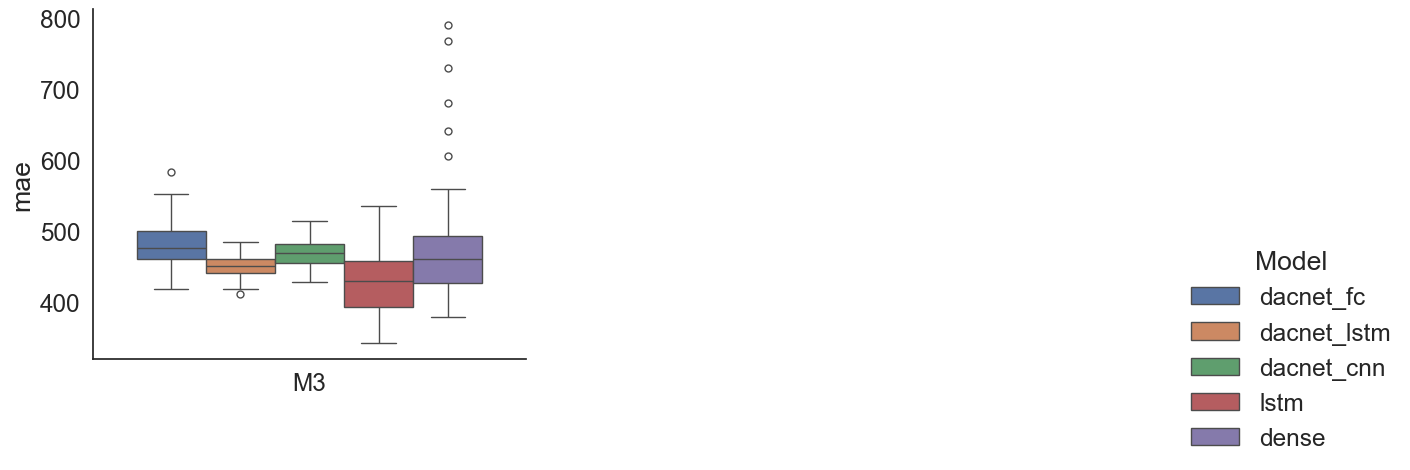

In [32]:
sns.set(font_scale=1.6, style='white')
plt.figure(figsize=(20,20))
#total_metrics.loc[:, 'selection_params_residual'] = total_metrics.loc[:, 'selection_params_residual'].fillna(False)
total_metrics_renamed = total_metrics.rename({'model_name': 'Model', 'rmse': 'RMSE', 'n_features': '# Features', 'duration': 'Duration'}, axis=1)
g = sns.catplot(data=total_metrics_renamed, kind='box', x='dataset_name', y="mae", col='dataset_name', hue='Model', sharex=False, sharey=False, col_wrap=3, legend=True)#.set(ylim=(1000, 1600))
g.set(xlabel=None)
g.set_titles(template='')

sns.move_legend(g, "upper left", bbox_to_anchor=(.70, .45))

plt.savefig('figures/boxplot_RMSE.png')

plt.show()

<Figure size 1440x1440 with 0 Axes>

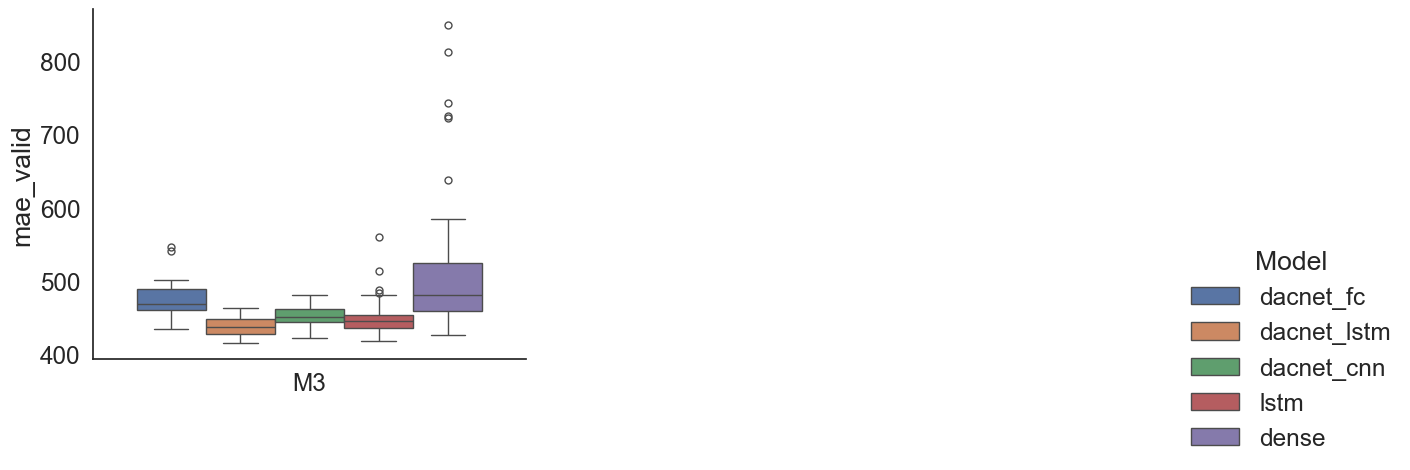

In [39]:
sns.set(font_scale=1.6, style='white')
plt.figure(figsize=(20,20))
#total_metrics.loc[:, 'selection_params_residual'] = total_metrics.loc[:, 'selection_params_residual'].fillna(False)
total_metrics_renamed = total_metrics.rename({'model_name': 'Model', 'rmse': 'RMSE', 'n_features': '# Features', 'duration': 'Duration'}, axis=1)
g = sns.catplot(data=total_metrics_renamed, kind='box', x='dataset_name', y="mae_valid", col='dataset_name', hue='Model', sharex=False, sharey=False, col_wrap=3, legend=True)#.set(ylim=(1000, 1600))
g.set(xlabel=None)
g.set_titles(template='')

sns.move_legend(g, "upper left", bbox_to_anchor=(.70, .45))

plt.savefig('figures/boxplot_RMSE.png')

plt.show()

## Bayesian tests

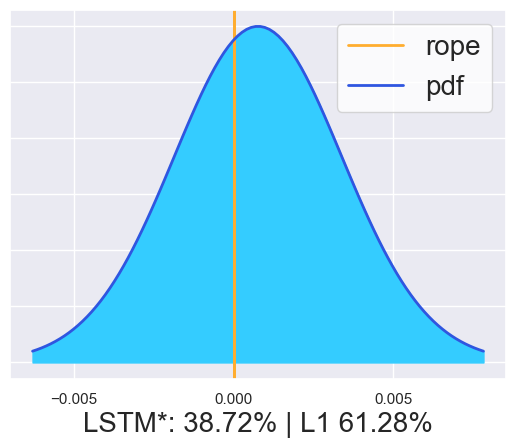

In [65]:
from baycomp import two_on_single
import matplotlib.pyplot as plt



for dataset in total_metrics.dataset_name.unique():
    metrics_tsl = total_metrics[(total_metrics.dataset_name==dataset) & (total_metrics.model_name=='dacnet_fc')].wape.values
    metrics_l1 = total_metrics[(total_metrics.dataset_name==dataset) & (total_metrics.model_name=='dense')].wape.values

    probs, fig = two_on_single(metrics_tsl, metrics_l1[:65], names=['LSTM*', 'L1'], plot=True)
    plt.xlabel(f'LSTM*: {round(probs[0]*100, 2)}% | L1 {round(probs[1]*100, 2)}%', fontsize=20)
    plt.legend(fontsize=20)

## Best hyperparameters

In [67]:
best_hyperparameters = best_results.groupby(["dataset_name", "model_name"]).head(1).reset_index().copy()

In [72]:
import numpy as np
pd.set_option('display.max_colwidth', 2000)
params = list(map(lambda my_dict: {k: round(my_dict[k], 4) if not my_dict[k].is_integer() else int(my_dict[k]) for k in my_dict if not np.isnan(my_dict[k])},best_hyperparameters.loc[:, ['model_params_layers', 'model_params_units', 'model_params_batch_size', 'model_params_lr','model_params_dropout']].to_dict('records')))
best_hyperparameters['window'] = best_hyperparameters.dataset_params_seq_len #
best_hyperparameters['params'] = params

best_hyperparameters[["dataset_name", "model_name", "window", "params", "dataset_params_seq_len"]].set_index(['dataset_name', 'model_name', 'window'])#.to_latex('tab.tex')

params  \
dataset_name model_name  window                                                                                                                                               
M3           dacnet_cnn  6         {'model_params_layers': 2, 'model_params_units': 32, 'model_params_batch_size': 32, 'model_params_lr': 0.003, 'model_params_dropout': 0}   
             dacnet_fc   6         {'model_params_layers': 2, 'model_params_units': 32, 'model_params_batch_size': 32, 'model_params_lr': 0.003, 'model_params_dropout': 0}   
             dacnet_lstm 6         {'model_params_layers': 1, 'model_params_units': 64, 'model_params_batch_size': 32, 'model_params_lr': 0.003, 'model_params_dropout': 0}   
             dense       6         {'model_params_layers': 3, 'model_params_units': 32, 'model_params_batch_size': 32, 'model_params_lr': 0.003, 'model_params_dropout': 0}   
             lstm        6       {'model_params_layers': 2, 'model_params_units': 32, 'model_params_batch_size': 32, 'model_params_lr': 0.003, 'model_params_dropout': 0.2}   

                                 dataset_params_seq_len  
dataset_name model_name  window                          
M3           dacnet_cnn  6                            6  
             dacnet_fc   6                            6  
             dacnet_lstm 6                            6  
             dense       6                            6  
             lstm        6                            6

In [ ]:
best_hyperparameters.to_csv("results/ResSelNet/params/best_params.csv")